# Linear regression in Tensorflow
This notebook showcases how to solve a linear regression problem using a traditional ML approach (=non-NN).
Let's start with plotting some data

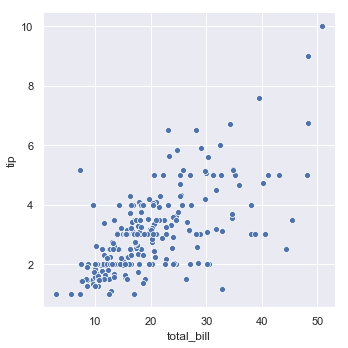

In [8]:
%matplotlib inline
import tensorflow as tf
import numpy as np
# Let's use the seaborn library to easily get some data and plot it
import seaborn as sns
sns.set()

# Load 'tips' dataset, only plot 'total_bill', and 'tip' and features (there's a bunch more features in this dataset)
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

Clearly there's a linear relationship between the amount of top and the total bill. Let's try to find the trend line here using linear regression in Tensorflow. 

In other words, let's try to build a predictor for `tip`, given `total_bill`. Put differently, let's try to find the slope (=gradient in >2D) of the trend line.

In [11]:
# When we're solving a linear regression problem using ML is basically trying to find the slope/gradient of the
# equation `y = W*X+b`. 
# Or put differently: given a bunch of correlated datapoints for `y` and `X`, 
# try to find the right values for `W` and `b` that minimize a give loss function (e.g. mean squared error).

# We know the values of our inputs X (=total_bill) and what we want to predict Y (=tip).
# Since we know the values from our dataset, we should use tf.placeholder
# We will feed the actual data in when we do training (in session.run)
X = tf.placeholder(shape=(None, 1), dtype=np.float64) # Shape = Nx1 (no need to specify length)
y = tf.placeholder(shape=(None, 1), dtype=np.float64) # Shape = Nx1

# W and b are the 
W = tf.Variable(0, dtype=np.float64)
b = tf.Variable(0, dtype=np.float64)

# tips['tip']
# tips['total_bill']